# 2024 国考进面分数的数据分析（2023年进行）

核心思路：
- 总体数据
- 分两类，每一类中
    - 总体数据
    - 排名
    - 地理分布
    - ...

In [1]:
# %pip install openpyxl
# %pip install geopandas
# %pip install fuzzywuzzy

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from fuzzywuzzy import process

/home/codespace/.python/current/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## 数据准备
- 从国家公务局网站下载excel

In [3]:
df = pd.read_excel('../data/guokao2024.xlsx')
df.shape

(115640, 7)

In [4]:
df

,准考证号,招录机关,部门代码,用人司局,招考职位,职位代码,最低面试分数
0,2111021301304,中央办公厅,2000,警卫局,档案管理岗位一级主任科员及以下,100110001001,110.1
1,2111071000324,中央办公厅,2000,警卫局,档案管理岗位一级主任科员及以下,100110001001,110.1
2,2111071401708,中央办公厅,2000,警卫局,档案管理岗位一级主任科员及以下,100110001001,110.1
3,2142050200204,中央办公厅,2000,警卫局,档案管理岗位一级主任科员及以下,100110001001,110.1
4,2161010109521,中央办公厅,2000,警卫局,档案管理岗位一级主任科员及以下,100110001001,110.1
...,...,...,...,...,...,...,...
115635,191111011900629,国家数据局,191000,机关司局五,机关司局一级主任科员及以下,200110005002,106.4
115636,191111120500430,国家数据局,191000,机关司局五,机关司局一级主任科员及以下,200110005002,106.4
115637,191111120602408,国家数据局,191000,机关司局五,机关司局一级主任科员及以下,200110005002,106.4
115638,191137090100804,国家数据局,191000,机关司局五,机关司局一级主任科员及以下,200110005002,106.4


## 总体概况

In [5]:
df['招录机关-用人司局-招考职位'] = df.apply(lambda row: f"{row['招录机关']}_{row['用人司局']}_{row['招考职位']}", axis=1)

In [6]:
print("职位代码去重后总数: " + str(df['职位代码'].nunique()))
print("招录机关-用人司局-招考职位组合去重后总数: " + str(df['招录机关-用人司局-招考职位'].nunique()))

职位代码去重后总数: 6493
招录机关-用人司局-招考职位组合去重后总数: 16006


In [7]:
df['最低面试分数'].describe()

count    115640.000000
mean        112.478784
std          23.569302
min          45.250000
25%         111.800000
50%         120.600000
75%         126.600000
max         144.700000
Name: 最低面试分数, dtype: float64

## 进行分类，考专业课和不考专业课

In [8]:
df_below_89 = df[df['最低面试分数'] < 89]
df_above_89 = df[df['最低面试分数'] >= 89]

In [9]:
print("包含专业课的岗位总数: " + str(df_below_89['招录机关-用人司局-招考职位'].nunique()))
print("不含专业课的岗位总数: " + str(df_above_89['招录机关-用人司局-招考职位'].nunique()))

包含专业课的岗位总数: 1760
不含专业课的岗位总数: 14246


In [10]:
df_below_89['最低面试分数'].describe()

count    16598.000000
mean        58.278703
std          4.996526
min         45.250000
25%         54.831250
50%         58.472500
75%         61.510000
max         72.925000
Name: 最低面试分数, dtype: float64

In [11]:
df_above_89['最低面试分数'].describe()

count    99042.00000
mean       121.56193
std          8.34317
min         90.00000
25%        116.60000
50%        122.40000
75%        127.50000
max        144.70000
Name: 最低面试分数, dtype: float64

## 包含专业课的岗位分析

In [12]:
df_below_89

,准考证号,招录机关,部门代码,用人司局,招考职位,职位代码,最低面试分数,招录机关-用人司局-招考职位
407,9111050900114,中央对外联络部,9000,三局,阿拉伯语翻译,100121004001,65.975,中央对外联络部_三局_阿拉伯语翻译
408,9111050900116,中央对外联络部,9000,三局,阿拉伯语翻译,100121004001,65.975,中央对外联络部_三局_阿拉伯语翻译
409,9111050900119,中央对外联络部,9000,三局,阿拉伯语翻译,100121004001,65.975,中央对外联络部_三局_阿拉伯语翻译
410,9111050900121,中央对外联络部,9000,三局,阿拉伯语翻译,100121004001,65.975,中央对外联络部_三局_阿拉伯语翻译
411,9111050900125,中央对外联络部,9000,三局,阿拉伯语翻译,100121004001,65.975,中央对外联络部_三局_阿拉伯语翻译
...,...,...,...,...,...,...,...,...
113703,164353012307105,国家移民管理局瑞丽遣返中心,164207,国家移民管理局瑞丽遣返中心,昆明遣返站执行五队一级警长及以下（二）,300130001022,57.190,国家移民管理局瑞丽遣返中心_国家移民管理局瑞丽遣返中心_昆明遣返站执行五队一级警长及以下（二）
113704,164353012407602,国家移民管理局瑞丽遣返中心,164207,国家移民管理局瑞丽遣返中心,昆明遣返站执行五队一级警长及以下（二）,300130001022,57.190,国家移民管理局瑞丽遣返中心_国家移民管理局瑞丽遣返中心_昆明遣返站执行五队一级警长及以下（二）
113705,164321010701207,国家移民管理局瑞丽遣返中心,164207,国家移民管理局瑞丽遣返中心,昆明遣返站执行五队一级警长及以下（三）,300130001023,56.560,国家移民管理局瑞丽遣返中心_国家移民管理局瑞丽遣返中心_昆明遣返站执行五队一级警长及以下（三）
113706,164333010108101,国家移民管理局瑞丽遣返中心,164207,国家移民管理局瑞丽遣返中心,昆明遣返站执行五队一级警长及以下（三）,300130001023,56.560,国家移民管理局瑞丽遣返中心_国家移民管理局瑞丽遣返中心_昆明遣返站执行五队一级警长及以下（三）


In [13]:
# 取分数最高的10个岗位
# 先排序，再分组，第一个head取每个组里的topN，第二个head取整个组的topN
df_below_89[['招录机关-用人司局-招考职位','最低面试分数']]\
    .sort_values(by='最低面试分数', ascending=False)\
    .groupby('招录机关-用人司局-招考职位')\
    .head(1)\
    .head(10)

,招录机关-用人司局-招考职位,最低面试分数
104931,国家金融监督管理总局_经济金融岗二_一级主任科员及以下,72.925
105030,国家金融监督管理总局天津监管局_国家金融监督管理总局天津监管局_监管部门一级主任科员及以下,72.825
106769,国家金融监督管理总局山东监管局_国家金融监督管理总局莱芜监管分局_监管部门一级主任科员及以下,72.525
13312,商务部_离退休干部局_一级主任科员及以下（法语）,72.300
106039,国家金融监督管理总局江苏监管局_国家金融监督管理总局江苏监管局_监管部门一级主任科员及以下,72.300
108714,国家金融监督管理总局陕西监管局_国家金融监督管理总局陕西监管局_监管部门一级主任科员及以下,72.175
105845,国家金融监督管理总局黑龙江监管局_国家金融监督管理总局黑龙江监管局_监管部门一级主任科员及以下,71.750
106072,国家金融监督管理总局江苏监管局_国家金融监督管理总局苏州监管分局_监管部门一级主任科员及以下,71.725
106064,国家金融监督管理总局江苏监管局_国家金融监督管理总局常州监管分局_监管部门一级主任科员及以下,71.650
106601,国家金融监督管理总局江西监管局_国家金融监督管理总局江西监管局南昌县级派出机构_监管部门一级...,71.625


In [14]:
# 取分数最低的10个岗位
# 先排序，再分组，第一个head取每个组里的topN，第二个head取整个组的topN
df_below_89[['招录机关-用人司局-招考职位','最低面试分数']]\
    .sort_values(by='最低面试分数', ascending=True)\
    .groupby('招录机关-用人司局-招考职位')\
    .head(1)\
    .head(10)

,招录机关-用人司局-招考职位,最低面试分数
108610,国家金融监督管理总局云南监管局_国家金融监督管理总局大理监管分局_财会部门一级主任科员及以下,45.250
7395,南宁铁路公安局_南宁铁路公安局_柳州铁路公安处基层所队民警,45.340
113050,新疆出入境边防检查总站_新疆出入境边防检查总站_红其拉甫出入境边防检查站一级警长及以下（二）,45.460
106476,国家金融监督管理总局安徽监管局_国家金融监督管理总局安庆监管分局岳西县级派出机构_综合部门一...,45.750
108010,国家金融监督管理总局广西监管局_国家金融监督管理总局贺州监管分局_财会部门一级主任科员及以下,45.850
105286,国家金融监督管理总局河北监管局_国家金融监督管理总局河北监管局辖内县级派出机构_综合部门一级...,46.075
113564,国家移民管理局东兴遣返中心_国家移民管理局东兴遣返中心_东兴遣返中心执行队一级警长及以下（一）,46.250
109139,国家金融监督管理总局新疆监管局_金融监管总局阿克苏监管分局_监管部门一级主任科员及以下,46.375
109169,国家金融监督管理总局新疆监管局_金融监管总局巴音郭楞监管分局_统计信息部门一级主任科员及以下,46.525
109099,国家金融监督管理总局新疆监管局_金融监管总局塔城监管分局和布克赛尔县级派出机构_监管部门一级...,46.575


In [15]:
# 岗位分数与地区的分布（不考虑中央级别）
# 地区数组
regions = ['北京', '天津', '上海', '重庆', 
           '内蒙古', '广西', '西藏', '宁夏', '新疆', 
           '河北', '山西', '辽宁', '吉林', '黑龙江', '江苏', 
           '江西', '山东', '河南', '湖北', '湖南', '广东', 
           '海南', '四川', '贵州', '云南', '西藏', '陕西', 
           '甘肃', '青海', '浙江', '安徽', '福建']

# 遍历每个地区，计算平均录取分数
region_scores = {}
for region in regions:
    region_data = df_below_89[df_below_89['招录机关-用人司局-招考职位'].str.contains(region)]  # 筛选出特定地区的数据
    average_score = region_data['最低面试分数'].mean()  # 计算平均录取分数
    # print(f"地区 {region} 的平均录取分数为 {average_score}")
    region_scores[region] = average_score
sorted(region_scores.items(), key=lambda x: x[1], reverse=True)[:10]

[('江苏', 63.08758536585365),
 ('浙江', 62.569803278688525),
 ('江西', 61.534659090909095),
 ('天津', 60.209364754098374),
 ('湖南', 59.938614649681526),
 ('四川', 59.699225663716824),
 ('北京', 59.67088486140726),
 ('广东', 59.521358543417364),
 ('重庆', 59.288492063492065),
 ('山西', 59.269492385786805)]

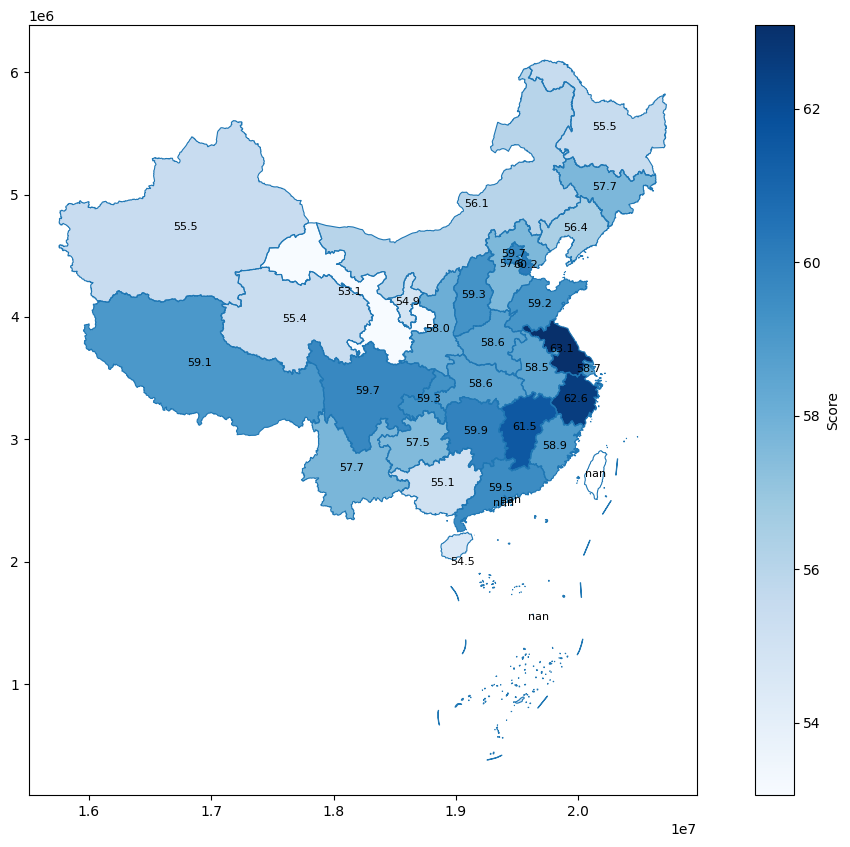

In [16]:
# 读取中国地图数据
# china_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
china_map = gpd.read_file('https://geo.datav.aliyun.com/areas_v3/bound/100000_full.json').to_crs('EPSG:4573')

# 获取地图数据中的地区名
map_region_names = china_map['name'].tolist()

# 模糊匹配地区名并添加分数到 GeoDataFrame
scored_regions = []
for input_region, score in region_scores.items():
    matched_region, _ = process.extractOne(input_region, map_region_names)
    scored_regions.append({'Region': matched_region, 'Score': score})

df_scores = gpd.GeoDataFrame(scored_regions, columns=['Region', 'Score'])
merged = china_map.merge(df_scores, how='left', left_on='name', right_on='Region')

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax, linewidth=0.8)
merged.plot(column='Score', ax=ax, legend=True, legend_kwds={'label': "Score"}, cmap='Blues', linewidth=0.8)

# 在地图上标注分数值
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['Score']):
   ax.text(x, y, f"{round(label, 1)}", fontsize=8, ha='center', va='center')

plt.show()


## 不含专业课的岗位分析

In [21]:
# 取分数最高的10个岗位
# 先排序，再分组，第一个head取每个组里的topN，第二个head取整个组的topN
df_above_89[['招录机关-用人司局-招考职位','最低面试分数']]\
    .sort_values(by='最低面试分数', ascending=False)\
    .groupby('招录机关-用人司局-招考职位')\
    .head(1)\
    .head(20)

,招录机关-用人司局-招考职位,最低面试分数
67512,国家税务总局青岛市税务局_国家税务总局青岛市市北区税务局_一级行政执法员（七）,144.7
50409,国家税务总局江苏省税务局_国家税务总局南京市江宁区税务局_一级行政执法员（二）,143.5
50346,国家税务总局江苏省税务局_国家税务总局南京市建邺区税务局_一级行政执法员（四）,143.3
104390,河南省气象局_河南省许昌市气象局_办公室一级主任科员及以下,143.3
65290,国家税务总局山东省税务局_国家税务总局烟台高新技术产业开发区税务局_一级行政执法员（三）,143.2
56374,国家税务总局浙江省税务局_国家税务总局舟山市税务局第二税务分局_一级行政执法员（二）,143.2
54504,国家税务总局浙江省税务局_国家税务总局绍兴市越城区税务局_一级行政执法员（一）,142.1
56987,国家税务总局宁波市税务局_国家税务总局慈溪市税务局_一级行政执法员（三）,142.0
50751,国家税务总局江苏省税务局_国家税务总局江阴市税务局_一级行政执法员（四）,142.0
68415,国家税务总局河南省税务局_国家税务总局郑州航空港实验区税务局第一税务分局_一级行政执法员（四）,141.9


In [18]:
# 取分数最低的10个岗位
# 先排序，再分组，第一个head取每个组里的topN，第二个head取整个组的topN
df_above_89[['招录机关-用人司局-招考职位','最低面试分数']]\
    .sort_values(by='最低面试分数', ascending=True)\
    .groupby('招录机关-用人司局-招考职位')\
    .head(1)\
    .head(10)

,招录机关-用人司局-招考职位,最低面试分数
103292,国家统计局四川调查总队_国家统计局四川调查总队_洪雅调查队一级科员,90.0
47668,国家税务总局黑龙江省税务局_国家税务总局宝清县税务局_一级行政执法员（二）,90.2
23648,呼和浩特海关_乌海海关_植物检疫监管一级行政执法员,90.3
10628,长江海事局_宜宾海事局_宜宾海事局一级行政执法员（一）,90.3
16802,中国人民银行安徽省分行_中国人民银行池州市分行_综合业务部门一级主任科员及以下,90.4
47008,国家税务总局黑龙江省税务局_国家税务总局拜泉县税务局_一级行政执法员（二）,90.4
114798,国家矿山安全监察局甘肃局_国家矿山安全监察局甘肃局_监察执法一处三级主任科员及以下,90.4
24195,哈尔滨海关_同江海关_办公综合一级行政执法员,90.4
35328,国家税务总局河北省税务局_国家税务总局阜城县税务局_一级行政执法员,90.4
104804,甘肃省气象局_甘肃省白银市气象局_业务科一级主任科员及以下,90.5


In [19]:
# 岗位分数与地区的分布（不考虑中央级别）
# 地区数组
regions = ['北京', '天津', '上海', '重庆', 
           '内蒙古', '广西', '西藏', '宁夏', '新疆', 
           '河北', '山西', '辽宁', '吉林', '黑龙江', '江苏', 
           '江西', '山东', '河南', '湖北', '湖南', '广东', 
           '海南', '四川', '贵州', '云南', '西藏', '陕西', 
           '甘肃', '青海', '浙江', '安徽', '福建']

# 遍历每个地区，计算平均录取分数
region_scores = {}
for region in regions:
    region_data = df_above_89[df_above_89['招录机关-用人司局-招考职位'].str.contains(region)]  # 筛选出特定地区的数据
    average_score = region_data['最低面试分数'].mean()  # 计算平均录取分数
    # print(f"地区 {region} 的平均录取分数为 {average_score}")
    region_scores[region] = average_score
sorted(region_scores.items(), key=lambda x: x[1], reverse=True)[:10]

[('北京', 126.19259086672879),
 ('天津', 126.07230142566192),
 ('山东', 126.04142367066895),
 ('浙江', 125.5936285936286),
 ('江苏', 124.84381616318099),
 ('湖北', 124.3874834261469),
 ('上海', 123.82204046491607),
 ('广东', 123.67601943798861),
 ('安徽', 123.386511627907),
 ('江西', 123.32584017923823)]

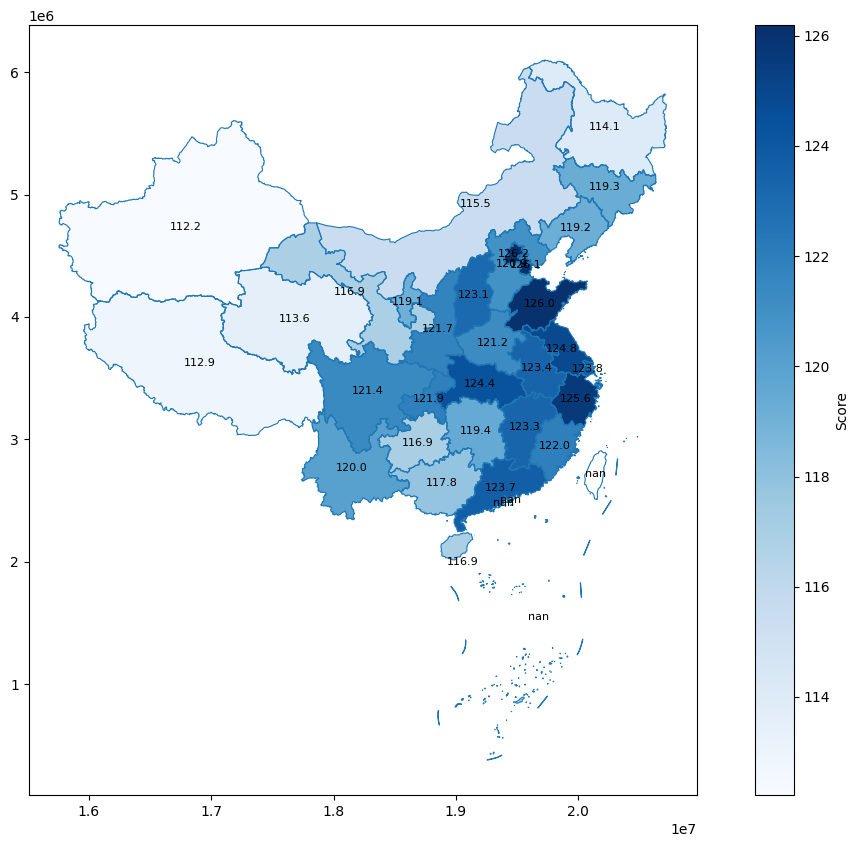

In [20]:
# 读取中国地图数据
# china_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
china_map = gpd.read_file('https://geo.datav.aliyun.com/areas_v3/bound/100000_full.json').to_crs('EPSG:4573')

# 获取地图数据中的地区名
map_region_names = china_map['name'].tolist()

# 模糊匹配地区名并添加分数到 GeoDataFrame
scored_regions = []
for input_region, score in region_scores.items():
    matched_region, _ = process.extractOne(input_region, map_region_names)
    scored_regions.append({'Region': matched_region, 'Score': score})

df_scores = gpd.GeoDataFrame(scored_regions, columns=['Region', 'Score'])
merged = china_map.merge(df_scores, how='left', left_on='name', right_on='Region')

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax, linewidth=0.8)
merged.plot(column='Score', ax=ax, legend=True, legend_kwds={'label': "Score"}, cmap='Blues', linewidth=0.8)

# 在地图上标注分数值
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['Score']):
   ax.text(x, y, f"{round(label, 1)}", fontsize=8, ha='center', va='center')

plt.show()

## 更多探索
- 跟报名表数据匹配，增加职位属性、招考人数等信息，可进行文理科分析、专业分析等功能
- 跟历年数据结合，可以进行时间序列为基础的各类分析
- ...